#<h1><font color="Orange">Método de bisección</font></h1>
El método de bisección se aplica a funciones algebraicas o trascendentes y proporciona únicamente raıces reales. Tiene su origen en un popular algoritmo de búsqueda de datos en arreglos vectoriales denominado búsqueda binaria. Es un método cerrado, es decir, requiere de un intervalo en el cual esté atrapada una `raız`.

<html lang="es">
<head>
  <meta charset="UTF-8">
  <style>
    .center-img {
      margin: 0 auto;
    }
  </style>
</head>
<body>
  <img src="https://arturoguillen90.files.wordpress.com/2014/06/biseccion07.png?w=625&h=473" alt="Producto Cruz" class="center-img">
</body>
</html>

Digite el primer numero: 6
Digite el segundo numero: 7
Digite la cantidad de iteraciones: 10
En la iteración 1 Xn es 6.5
En la iteración 2 Xn es 6.25
En la iteración 3 Xn es 6.375
En la iteración 4 Xn es 6.4375
En la iteración 5 Xn es 6.40625
En la iteración 6 Xn es 6.390625
En la iteración 7 Xn es 6.3984375
En la iteración 8 Xn es 6.40234375
En la iteración 9 Xn es 6.404296875
En la iteración 10 Xn es 6.4052734375


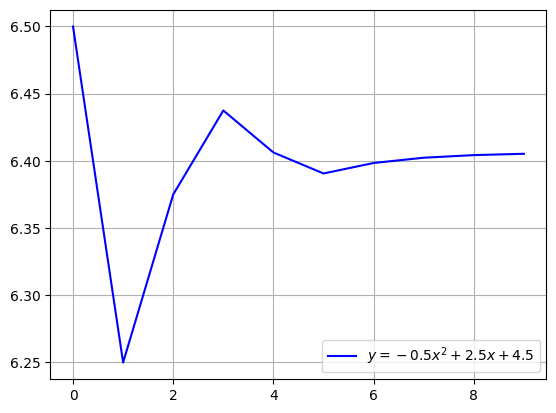

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fun(x):
  return (-0.5*x**2) + (2.5*x) + 4.5

a = float(input("Digite el primer numero: "))
b = float(input("Digite el segundo numero: "))
iter = int(input("Digite la cantidad de iteraciones: "))

f_a = fun(a)
f_b = fun(b)

List_i = []
List_Xn = []
List_Error = []

for i in range(iter):

  List_i.append(i)

  if f_a * f_b == 0:
    if f_a == 0:
      print(f"la raiz es {a}")
      break

    else:
      print(f"la raiz es {b}")
      break
  else:
    if f_a * f_b < 0:
      #Hallando Xn despejando la ecuacion de la recta
      Xn = (a+b) / 2
      f_Xn = fun(Xn)
      List_Xn.append(Xn)
      if (i >= 1):
        xnold = List_Xn[i-1]
        Error = np.abs((Xn - xnold) / Xn) * 100
      else :
        Error = 100
      List_Error.append(Error)
      if (f_a * f_Xn == 0):
        print(f"La raiz en: {Xn}")
        break
      else:
        if f_a * f_Xn < 0:
          b = Xn
          f_b = f_Xn
        else:
          a = Xn
          f_a = f_Xn
    else:
      print(f"La raiz no esta entre {a} y {b}")
      break
    print(f"En la iteración {1 + i} Xn es {Xn}")

plt.plot(List_i, List_Xn, 'b-', label='$y=-0.5x^2 + 2.5x + 4.5$')
plt.grid()
plt.legend(loc ='lower right')
plt.show()

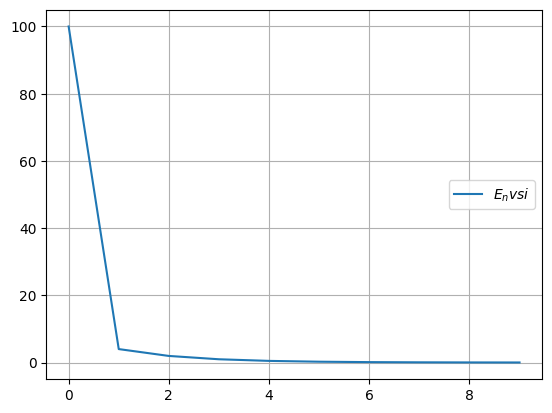

In [ ]:
plt.plot(List_i, List_Error, label = '$E_{n} vs  {i}$')
plt.grid()
plt.legend(loc = 'right')
plt.show()

#<h1><font color="Orange">Código con Tolerancia</font></h1>

En la iteración 1, xn es 5.333333333333333
Error = 15.58752997601919
En la iteración 2, xn es 6.318181818181818
Error = 1.2615480164583435
En la iteración 3, xn es 6.398907103825136
Error = 0.09020501240110652
En la iteración 4, xn es 6.404684450227716
Error = 0.006388938927947265
En la iteración 5, xn es 6.405093667750426
Error = 0.0004522023415036154
En la iteración 6, xn es 6.405122631864944


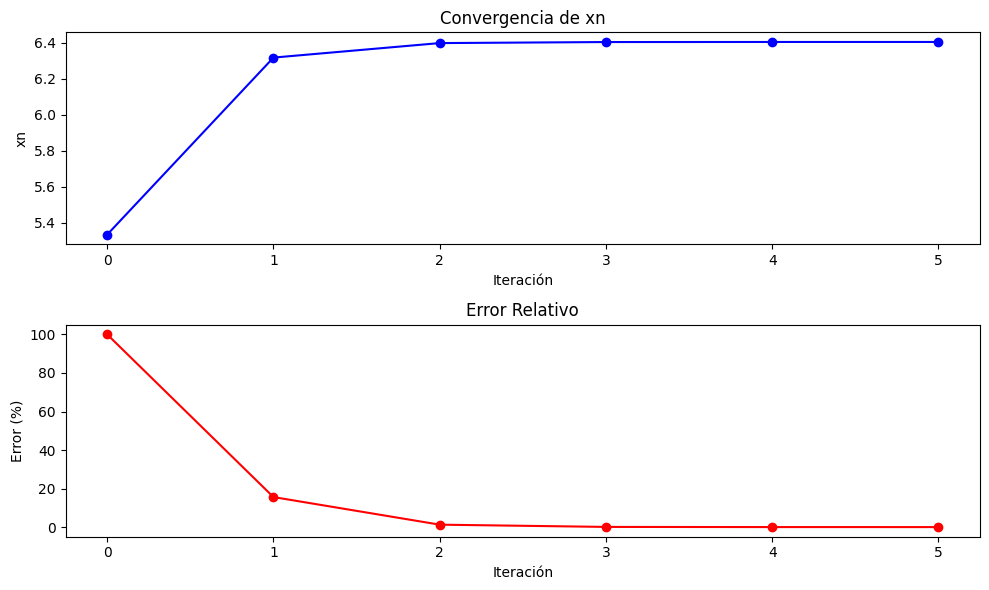

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funcion(x):
    return -0.5 * x ** 2 + 2.5 * x + 4.5

def error(X_nuevo, X_anterior):
    return abs((X_nuevo - X_anterior) / X_nuevo) * 100

a = 1
b = 7

tolerancia = 1E-3
i = 0
list_xn = []
list_i = []
list_error = []
Error = 100

fa = funcion(a)
fb = funcion(b)

while tolerancia <= Error:
    if fa * fb == 0:
        if fa == 0:
            print(f"La raíz es {a}")
        else:
            print(f"La raíz es {b}")
        break
    elif fa * fb < 0:
        xn = a - fa*(b - a)/(fb - fa)
        fxn = funcion(xn)
        list_xn.append(xn)
        list_i.append(i)

        if i >= 1:
            X_nuevo = list_xn[i]
            X_anterior = list_xn[i - 1]
            Error = error(X_nuevo, X_anterior)
            list_error.append(Error)
            print(f"Error = {Error}")
        else:

            list_error.append(Error)

        if fa * fxn == 0:
            print(f"La raíz es {xn}")
            break
        elif fa * fxn < 0:
            b = xn
            fb = fxn
        else:
            a = xn
            fa = fxn
        i += 1
        print(f"En la iteración {i}, xn es {xn}")
    else:
        print(f"La raíz no está en el intervalo [{a}, {b}]")
        break

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(list_i, list_xn, marker='o', color='b')
plt.title('Convergencia de xn')
plt.xlabel('Iteración')
plt.ylabel('xn')

plt.subplot(2, 1, 2)
plt.plot(list_i, list_error, marker='o', color='r')
plt.title('Error Relativo')
plt.xlabel('Iteración')
plt.ylabel('Error (%)')

plt.tight_layout()
plt.show()